Градієнтний спуск - оптимізовані ваги: [1.40194829e-04 5.44113813e-01 2.26556593e-01] Зміщення: -2.0937108824580184
Аналітичне рішення - ваги: [2.02685357e-04 7.41709512e-01 2.17699505e-01] Зміщення: -2.6434636431766245
Модель sklearn - коефіцієнти: [3.78762754e+02 1.38604950e+06 4.06820034e+05] Зміщення: -173171.60763263796
MSE Градієнтний спуск: 1905348492517.2512
MSE Аналітичне рішення: 1791170049977.3193
MSE Sklearn: 1791170049977.3193


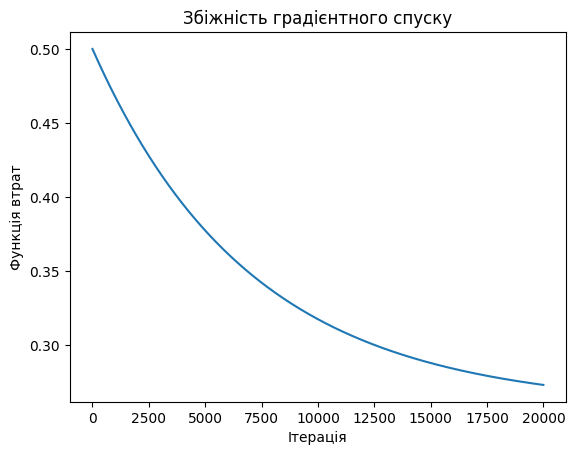

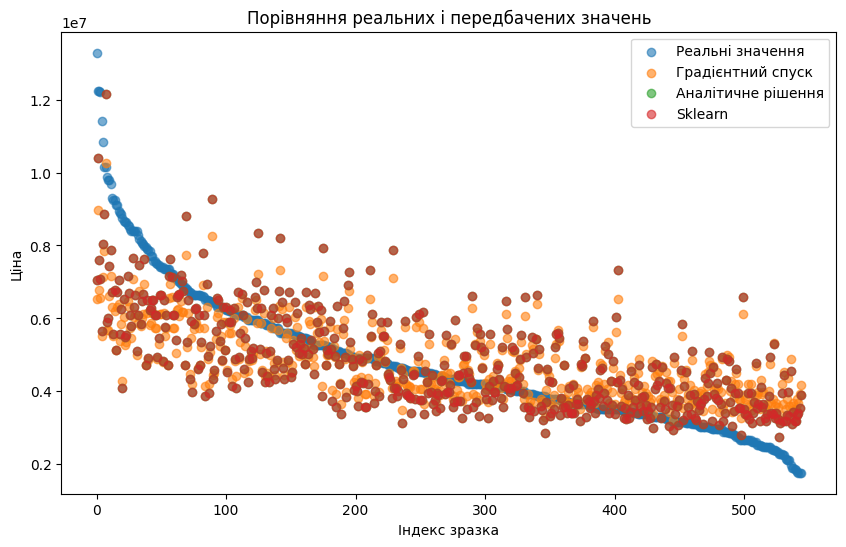

In [8]:

import matplotlib.pyplot as plt

# Завантаження даних із CSV
url = "https://drive.google.com/uc?id=1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo"
data = pd.read_csv(url)

# Вибір ознак і цільової змінної
X = data[["area", "bathrooms", "bedrooms"]].values
y = data["price"].values

# Масштабування даних
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Додавання стовпця одиниць для зміщення
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Функція гіпотези
def hypothesis(X, w):
    return np.dot(X, w)

# Функція втрат
def loss_function(X, y, w):
    m = len(y)
    predictions = hypothesis(X, w)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Градієнтний спуск із записом втрат
def gradient_descent(X, y, w, learning_rate, iterations):
    m = len(y)
    losses = []
    for i in range(iterations):
        predictions = hypothesis(X, w)
        gradient = (1 / m) * np.dot(X.T, (predictions - y))
        w -= learning_rate * gradient
        losses.append(loss_function(X, y, w))
    return w, losses

# Ініціалізація параметрів
w = np.zeros(X_scaled.shape[1])
learning_rate = 0.00005  # Зменшено для більш точної збіжності
iterations = 20000  # Збільшено кількість ітерацій

# Навчання моделі за допомогою градієнтного спуску
w_optimized, losses = gradient_descent(X_scaled, y_scaled, w, learning_rate, iterations)

# Прогнозування
predictions_scaled = hypothesis(X_scaled, w_optimized).reshape(-1, 1)
predictions = scaler_y.inverse_transform(predictions_scaled).flatten()

# Аналітичне рішення
w_analytical = np.linalg.inv(X_scaled.T @ X_scaled) @ X_scaled.T @ y_scaled
predictions_analytical_scaled = hypothesis(X_scaled, w_analytical).reshape(-1, 1)
predictions_analytical = scaler_y.inverse_transform(predictions_analytical_scaled).flatten()

# Перевірка за допомогою sklearn
model = LinearRegression()
model.fit(X, y)
sklearn_predictions = model.predict(X)

# Відновлення масштабу ваг для порівняння зі sklearn
w_optimized_unscaled = w_optimized[1:] / scaler_X.scale_  # Масштабування ваг градієнтного спуску
w_optimized_unscaled_0 = w_optimized[0] - np.sum(w_optimized[1:] * scaler_X.mean_ / scaler_X.scale_)

w_analytical_unscaled = w_analytical[1:] / scaler_X.scale_
w_analytical_unscaled_0 = w_analytical[0] - np.sum(w_analytical[1:] * scaler_X.mean_ / scaler_X.scale_)

# Порівняння результатів
print("Градієнтний спуск - оптимізовані ваги:", w_optimized_unscaled, "Зміщення:", w_optimized_unscaled_0)
print("Аналітичне рішення - ваги:", w_analytical_unscaled, "Зміщення:", w_analytical_unscaled_0)
print("Модель sklearn - коефіцієнти:", model.coef_, "Зміщення:", model.intercept_)

print("MSE Градієнтний спуск:", mean_squared_error(y, predictions))
print("MSE Аналітичне рішення:", mean_squared_error(y, predictions_analytical))
print("MSE Sklearn:", mean_squared_error(y, sklearn_predictions))

# Візуалізація збіжності функції втрат
plt.plot(range(iterations), losses)
plt.xlabel('Ітерація')
plt.ylabel('Функція втрат')
plt.title('Збіжність градієнтного спуску')
plt.show()

# Візуалізація прогнозів
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, label="Реальні значення", alpha=0.6)
plt.scatter(range(len(y)), predictions, label="Градієнтний спуск", alpha=0.6)
plt.scatter(range(len(y)), predictions_analytical, label="Аналітичне рішення", alpha=0.6)
plt.scatter(range(len(y)), sklearn_predictions, label="Sklearn", alpha=0.6)
plt.legend()
plt.xlabel("Індекс зразка")
plt.ylabel("Ціна")
plt.title("Порівняння реальних і передбачених значень")
plt.show()





